<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

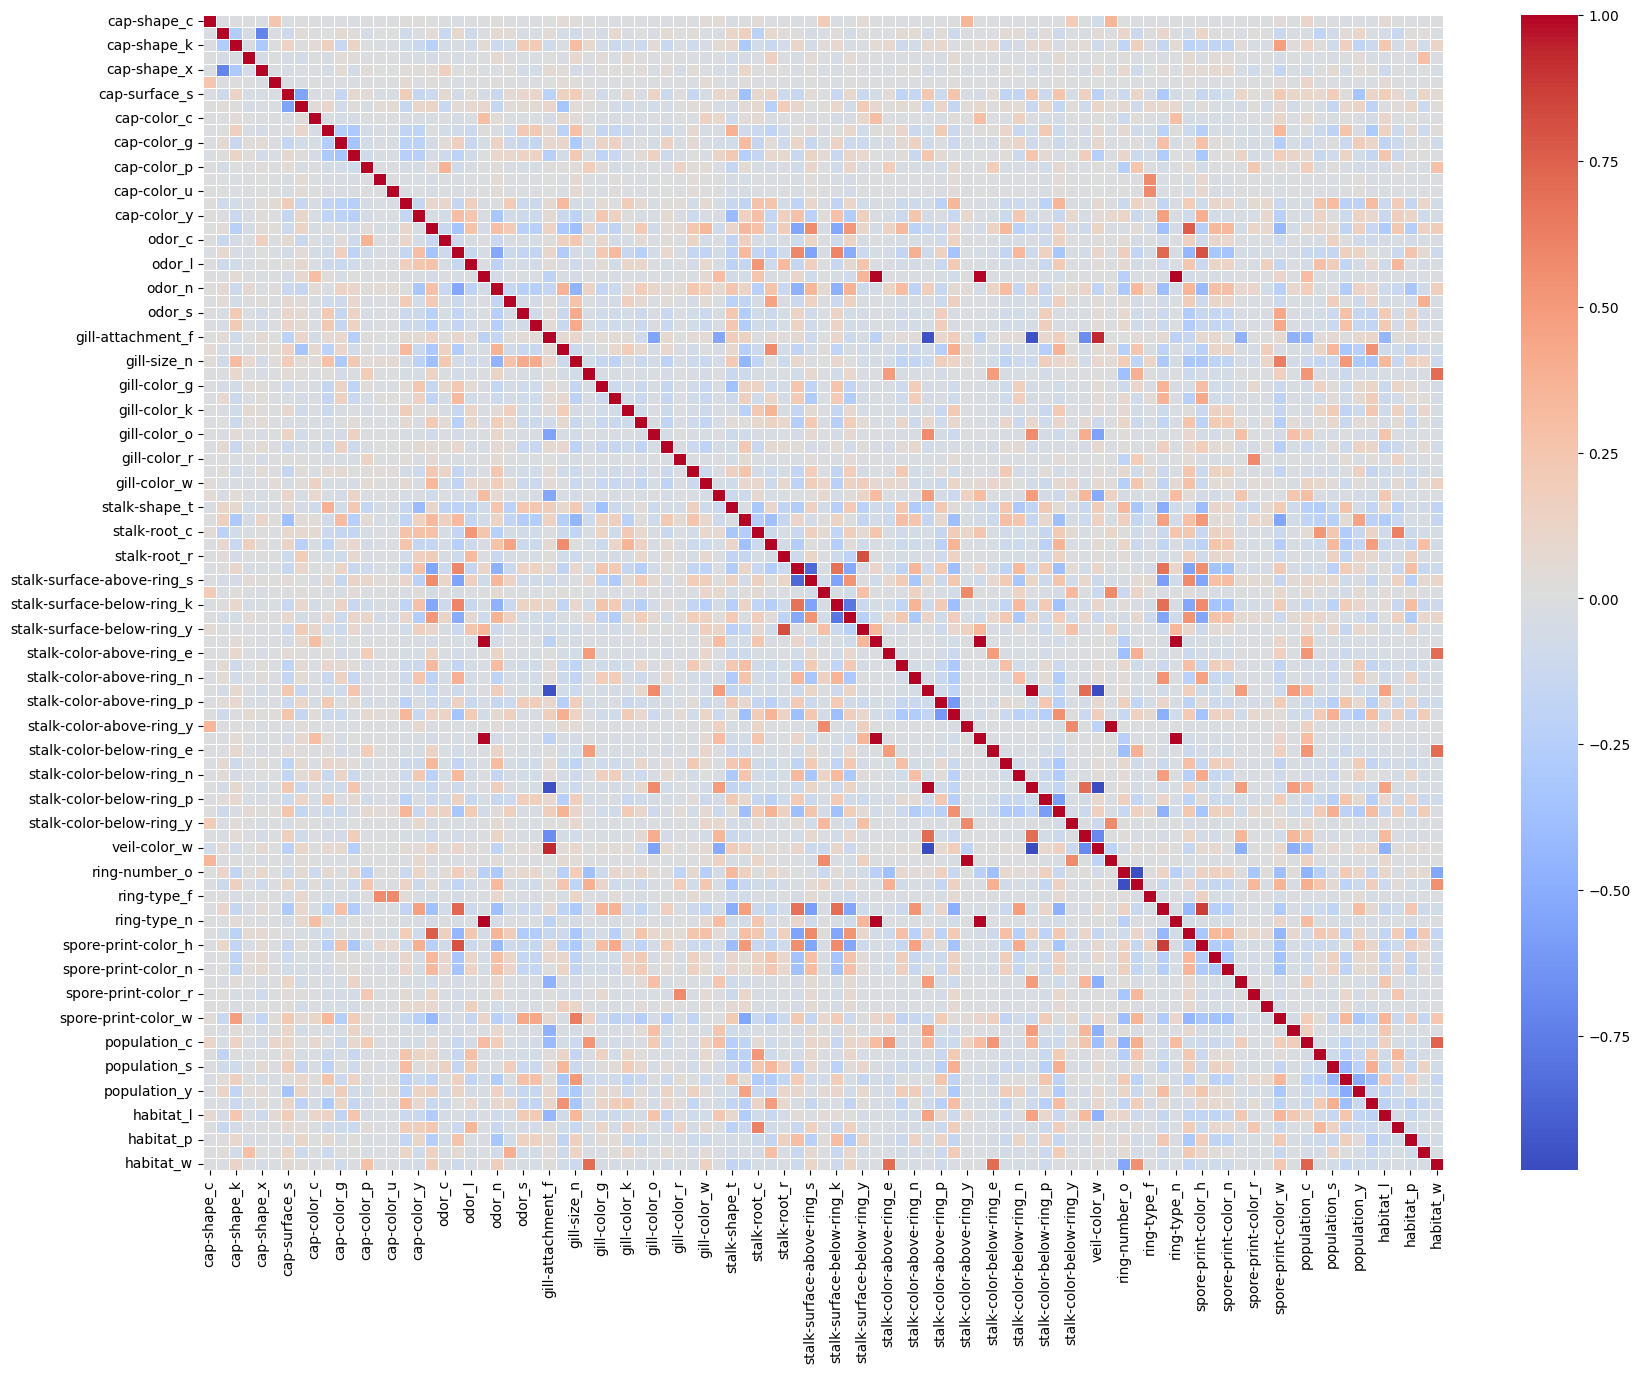

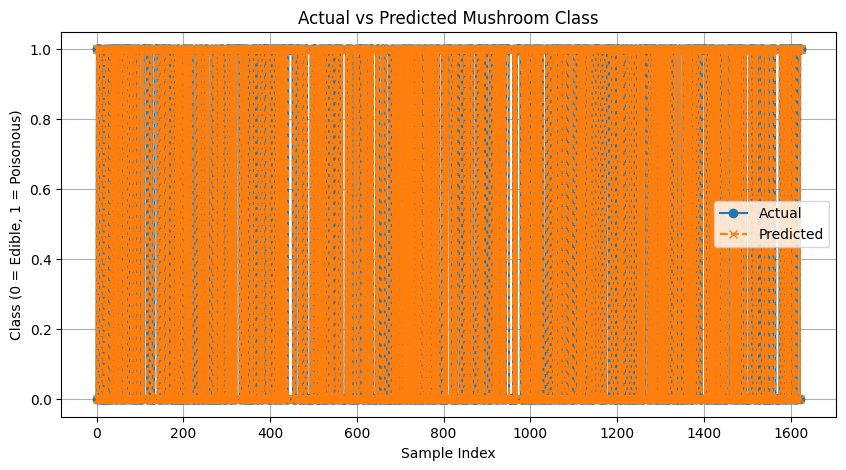

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df=pd.read_csv('/content/mushrooms.csv')
df.info()
df.describe()

print(df['class'].value_counts())
df.head(50)
df.isnull().sum()

X= pd.get_dummies(df.drop('class',axis=1),drop_first=True)
y= df['class'].map({'e':0,'p':1})

corr=X.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.show()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestClassifier(n_estimators=50,random_state=100)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
x_axis = np.arange(len(y_test))

plt.figure(figsize=(10, 5))
plt.plot(x_axis, y_test, label='Actual', marker='o')
plt.plot(x_axis, y_pred, label='Predicted', marker='x', linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = Edible, 1 = Poisonous)")
plt.title("Actual vs Predicted Mushroom Class")
plt.legend()
plt.grid(True)
plt.show()